# Import Functions

In [29]:
from functools import partial
from multiprocessing import Pool

from lhcsmapi.Time import Time
from lhcsmapi.Timer import Timer

from lhcsmapi.pyedsl.QueryBuilder import QueryBuilder
from lhcsmapi.reference.Reference import Reference

from lhcsmapi.analysis.RbCircuitAnalysis import check_show_next
from lhcsmapi.analysis.RbCircuitAnalysis import RbCircuitAnalysis

# User Input

In [2]:
circuit_type = 'RB'
circuit_name = 'RB.A12'
start_time = '2018-03-13 18:14:00+01:00'
stop_time = '2018-03-13 20:40:00+01:00'

# Execute a Parallel Query
- Find PM QH events

In [9]:
source_timestamp_df = QueryBuilder().with_pm() \
    .with_duration(t_start='2018-03-13 18:14:00+01:00', t_end='2018-03-13 20:40:00+01:00') \
    .with_circuit_type('RB') \
    .with_metadata(circuit_name='RB.A12', system='QH', source='*') \
    .event_query().df

source_timestamp_df

source            timestamp
0     A8R1  1520961280237000000
1     B8R1  1520968871800000000
2     A9R1  1520968880418000000
3     B9R1  1520968887644000000
4    A10R1  1520968894726000000
5    B10R1  1520968901629000000
6    A11R1  1520968908845000000
7    B11R1  1520968915682000000
8    A12R1  1520968922262000000
9    B12R1  1520968928630000000
10   C12R1  1520968934952000000
11   A13R1  1520968940426000000
12   B13R1  1520968948264000000
13   C13R1  1520968954991000000
14   A14R1  1520968961673000000
15   B14R1  1520968968815000000
16   C14R1  1520968974126000000
17   A15R1  1520968982411000000
18   B15R1  1520968989362000000
19   C15R1  1520968996272000000
20   A16R1  1520969003703000000
21   B16R1  1520969011204000000
22   C16R1  1520969017811000000
23   A17R1  1520969024304000000
24   B17R1  1520969030775000000
25   C17R1  1520969037420000000
26   A18R1  1520969044062000000
27   B18R1  1520969054965000000
28   C18R1  1520969061783000000
29   A19R1  1520969068276000000
..     ...                  ...
123  A19L2  1520969747339000000
124  C18L2  1520969753550000000
125  B18L2  1520969760130000000
126  A18L2  1520969766626000000
127  C17L2  1520969773312000000
128  B17L2  1520969782813000000
129  A17L2  1520969788923000000
130  C16L2  1520969795314000000
131  B16L2  1520969801862000000
132  A16L2  1520969808362000000
133  C15L2  1520969814822000000
134  B15L2  1520969821320000000
135  A15L2  1520969827823000000
136  C14L2  1520969834254000000
137  B14L2  1520969841193000000
138  A14L2  1520969849970000000
139  C13L2  1520969857786000000
140  B13L2  1520969865103000000
141  A13L2  1520969871292000000
142  C12L2  1520969877728000000
143  B12L2  1520969885219000000
144  A12L2  1520969891699000000
145  B11L2  1520969899032000000
146  A11L2  1520969906217000000
147  B10L2  1520969912787000000
148  A10L2  1520969919428000000
149   B9L2  1520969925939000000
150   A9L2  1520969935139000000
151   B8L2  1520969940126000000
152   A8L2  1520969947975000000

[153 rows x 2 columns]

- Query in parallel several QH events

In [10]:
def query_qh(input_param):
    source, timestamp, is_ref = input_param
    if is_ref:
        timestamp = Reference.get_quench_heater_reference_discharge('RB', source)
        
    u_hds_dfs = QueryBuilder().with_pm() \
        .with_timestamp(timestamp) \
        .with_circuit_type('RB') \
        .with_metadata(circuit_name='RB.A12', system='QH', signal=['U_HDS', 'I_HDS'], source=source, wildcard={'CELL': source}) \
        .signal_query()\
        .synchronize_time(timestamp)\
        .convert_index_to_sec().dfs
    
    print('Done: %s: %d' % (source, timestamp))
    
    return u_hds_dfs

# Query QH Discharges

In [11]:
input_params = list(zip(source_timestamp_df['source'].values, source_timestamp_df['timestamp'].values, [False]*len(source_timestamp_df)))

with Timer():
    with Pool(processes=8) as pool:
        qh_dfs = pool.map(query_qh, input_params)

Done: A16R1: 1520969003703000000
Done: A8R1: 1520961280237000000
Done: B19R1: 1520969074806000000
Done: B10R1: 1520968901629000000
Done: C17R1: 1520969037420000000
Done: B14R1: 1520968968815000000
Done: A21R1: 1520969107233000000
Done: C12R1: 1520968934952000000
Done: B16R1: 1520969011204000000
Done: B8R1: 1520968871800000000
Done: A11R1: 1520968908845000000
Done: C19R1: 1520969081174000000
Done: A18R1: 1520969044062000000
Done: C14R1: 1520968974126000000
Done: B21R1: 1520969113874000000
Done: A13R1: 1520968940426000000
Done: C16R1: 1520969017811000000
Done: A9R1: 1520968880418000000
Done: A20R1: 1520969087909000000
Done: A15R1: 1520968982411000000
Done: C21R1: 1520969123482000000
Done: B11R1: 1520968915682000000
Done: B18R1: 1520969054965000000
Done: B13R1: 1520968948264000000
Done: A17R1: 1520969024304000000
Done: B9R1: 1520968887644000000
Done: B20R1: 1520969094235000000
Done: B15R1: 1520968989362000000
Done: C18R1: 1520969061783000000
Done: A22R1: 1520969130569000000
Done: A12R1: 1

# Query Reference QH Discharges

In [13]:
input_params = list(zip(source_timestamp_df['source'].values, source_timestamp_df['timestamp'].values, [True]*len(source_timestamp_df)))

with Timer():
    with Pool(processes=8) as pool:
        qh_ref_dfs = pool.map(query_qh, input_params)

Done: B14R1: 1417014979212000000
Done: A16R1: 1417015144413000000
Done: C17R1: 1417015246912000000
Done: A21R1: 1417017654913000000
Done: B19R1: 1417015374813000000
Done: B10R1: 1417014747513000000
Done: A8R1: 1417014253613000000
Done: C12R1: 1417010305712000000
Done: B16R1: 1417015215413000000
Done: A18R1: 1417015276113000000
Done: C14R1: 1417014946613000000
Done: B21R1: 1417015621012000000
Done: C19R1: 1417015525114000000
Done: A11R1: 1417014661012000000
Done: A13R1: 1417014823258000000
Done: B8R1: 1417014489513000000
Done: C16R1: 1417015175312000000
Done: B18R1: 1417015424912000000
Done: B11R1: 1417014781913000000
Done: C21R1: 1417017670412000000
Done: A15R1: 1417015023213000000
Done: B13R1: 1417010337213000000
Done: A9R1: 1417014608012000000
Done: A20R1: 1417015577613000000
Done: A17R1: 1417015232212000000
Done: B15R1: 1417014962813000000
Done: A12R1: 1417010263013000000
Done: A22R1: 1417017689912000000
Done: C18R1: 1417015322013000000
Done: B9R1: 1417014713112000000
Done: C13R1: 1

# Sort

In [41]:
source_timestamp_df.sort_values(by='source', inplace=True)
source_timestamp_df.reset_index(drop=True, inplace=True)

qh_dfs.sort(key=lambda el: el[0].columns.values[0].split(':')[0])
qh_ref_dfs.sort(key=lambda el: el[0].columns.values[0].split(':')[0])

# Create a Dictionary

In [ ]:
qh_dfs[0]

In [ ]:
qh_dfs_dct = {k, qh_df for qh_df in qh_dfs}

# Calculate Features and Plot Signals

0/153: Analysing quench heater signals of A10L2 on 2018-03-13 20:38:39.428, 1520969919428000000


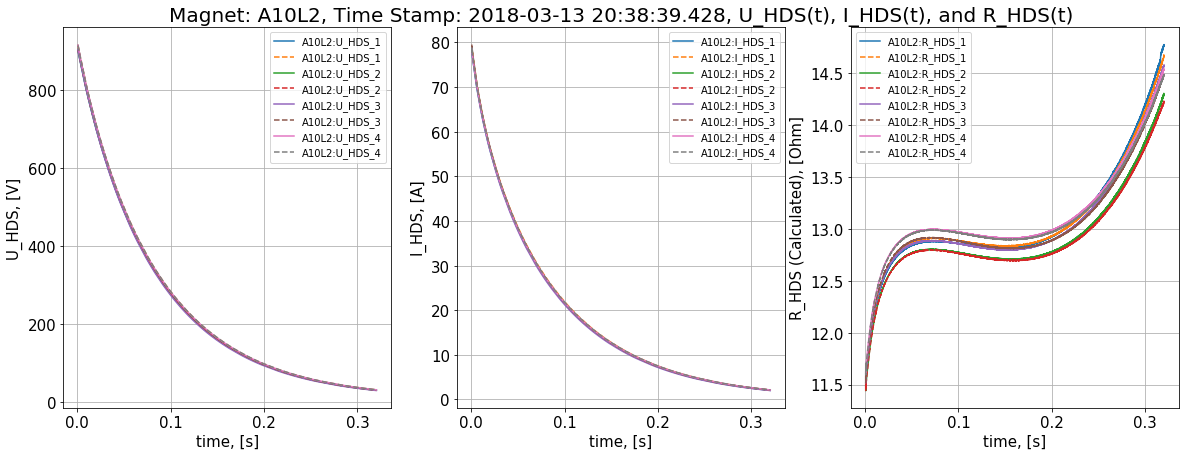

Show next? [Y or N]:
1/153: Analysing quench heater signals of A10R1 on 2018-03-13 20:21:34.726, 1520968894726000000


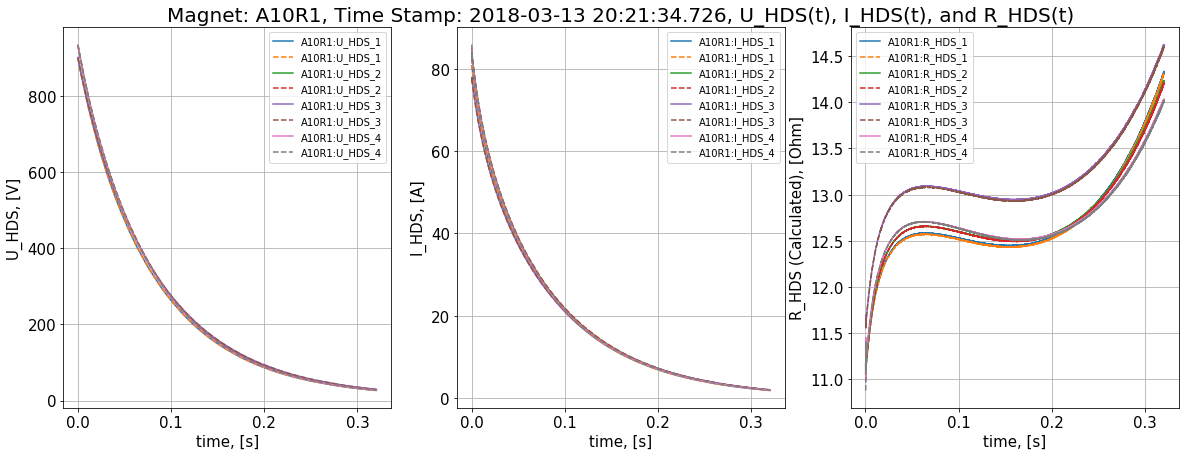

Show next? [Y or N]:
2/153: Analysing quench heater signals of A11L2 on 2018-03-13 20:38:26.217, 1520969906217000000


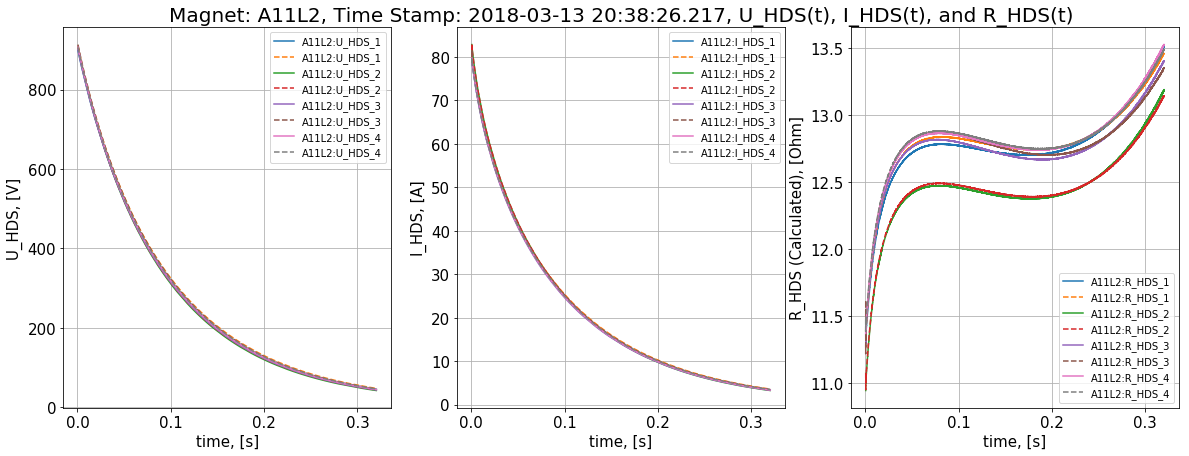

In [ ]:
index_max = len(qh_dfs)
for index, row in source_timestamp_df.iterrows():
    source = row['source']
    timestamp = row['timestamp']
    
    print('{}/{}: Analysing quench heater signals of {} on {}, {}'.format(index, index_max, source, Time.to_string_short(timestamp), timestamp))
    
    # Get matching voltage and current
    u_hds_dfs = list(filter(lambda col: 'U_HDS' in col.columns.values[0], qh_dfs[index]))
    i_hds_dfs = list(filter(lambda col: 'I_HDS' in col.columns.values[0], qh_dfs[index]))
    
    # Get matching reference voltage and current
    u_hds_ref_dfs = list(filter(lambda col: 'U_HDS' in col.columns.values[0], qh_ref_dfs[index]))
    i_hds_ref_dfs = list(filter(lambda col: 'I_HDS' in col.columns.values[0], qh_ref_dfs[index]))
    
    is_qh_correct = RbCircuitAnalysis('RB', 'RB.A12').analyze_single_qh(timestamp, source, u_hds_dfs, i_hds_dfs, u_hds_ref_dfs, i_hds_ref_dfs)

    # Show next
    check_show_next(index, index_max, is_automatic=False)